<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/karaAI/%E5%86%8D%E5%BA%A6%E3%81%8B%E3%82%89%E3%81%82%E3%81%92%E5%85%88%E7%94%9F%E3%81%AE%E5%8B%89%E5%BC%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 参考URL

https://github.com/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_classification_grad_cam.ipynb

In [1]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 8.76 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
!ls datasets

choki  gu  pa


In [3]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


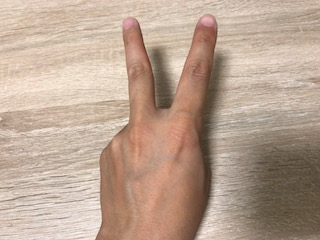

In [4]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [5]:
# GoogleColabにディレクトリの構造を可視化するためのtreeというソフトをインストール
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (166 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 155455 files and directories currently install

In [6]:
#treeで現状のディレクトリ構成を確認
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [7]:
#変数の定義
dataset_original_dir = 'datasets'
dataset_root_dir = 'target_datasets'

In [8]:
#分割ソフトのダウンロード（からあげ氏自作とのこと）
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-20 13:06:44--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-20 13:06:44 (32.9 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [9]:
import split_train_val

In [10]:
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67
)

datasets/choki copy is done
datasets/gu copy is done
datasets/pa copy is done
processing is done


In [11]:
!ls target_datasets/train/choki/

IMG_0771.JPG  IMG_0787.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0773.JPG  IMG_0789.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0775.JPG  IMG_0790.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0879.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0880.JPG
IMG_0779.JPG  IMG_0792.JPG  IMG_0802.JPG  IMG_0815.JPG	IMG_0881.JPG
IMG_0780.JPG  IMG_0793.JPG  IMG_0805.JPG  IMG_0818.JPG	IMG_0882.JPG
IMG_0781.JPG  IMG_0794.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0883.JPG
IMG_0783.JPG  IMG_0795.JPG  IMG_0808.JPG  IMG_0873.JPG	IMG_0884.JPG
IMG_0784.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


In [12]:
!ls target_datasets/val/choki

choki_01.jpg  IMG_0778.JPG  IMG_0801.JPG  IMG_0816.JPG	IMG_0878.JPG
IMG_0770.JPG  IMG_0782.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0885.JPG
IMG_0772.JPG  IMG_0785.JPG  IMG_0804.JPG  IMG_0870.JPG
IMG_0774.JPG  IMG_0786.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0776.JPG  IMG_0788.JPG  IMG_0809.JPG  IMG_0874.JPG


In [13]:
#訓練データと検証データの場所を変数として定義しておく
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

## 教師データのラベル作成
学習するファイルのラベルを作成します。
必要なライブラリをインポート

In [14]:
import sys
import os
import shutil

In [15]:
backup_dir = './model'

In [16]:
#ラベルデータを作成（最後に表示されるclass numberが画像の種類の数）

In [17]:
labels = [d for d in os.listdir(dataset_original_dir) \
    if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
  for label in labels:
    f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

class number=3


In [18]:
!cat ./model/labels.txt

choki
gu
pa


##学習の事前準備
ライブラリのインポート

In [19]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [20]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [22]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)

NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [23]:
#学習のハイパーパラメータ設定
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 8

In [24]:
#データセットの前処理
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [25]:
#前処理の確認
#イテレータの中身を確認しておきます。イテレータの中身を確認するには next関数を使うのが簡単。
(image_data,label_data) = train_data.next()
print(image_data)
print(label_data)

[[[[0.9294118  0.8431373  0.78823537]
   [0.95294124 0.87843144 0.8196079 ]
   [0.86274517 0.78823537 0.7294118 ]
   ...
   [0.76470596 0.68235296 0.6156863 ]
   [0.7294118  0.64705884 0.57254905]
   [0.7607844  0.6745098  0.5921569 ]]

  [[0.8862746  0.80392164 0.7372549 ]
   [0.8862746  0.80392164 0.7372549 ]
   [0.86274517 0.78823537 0.72156864]
   ...
   [0.6784314  0.59607846 0.5294118 ]
   [0.74509805 0.6627451  0.59607846]
   [0.76470596 0.68235296 0.60784316]]

  [[0.92549026 0.8352942  0.76470596]
   [0.909804   0.82745105 0.75294125]
   [0.90196085 0.8196079  0.74509805]
   ...
   [0.6862745  0.6117647  0.54509807]
   [0.7058824  0.62352943 0.5568628 ]
   [0.69803923 0.6156863  0.54901963]]

  ...

  [[0.63529414 0.45882356 0.38431376]
   [0.6431373  0.45882356 0.3803922 ]
   [0.65882355 0.48235297 0.40000004]
   ...
   [0.3921569  0.32941177 0.26666668]
   [0.43529415 0.37254903 0.3137255 ]
   [0.4039216  0.34117648 0.28235295]]

  [[0.6392157  0.454902   0.38431376]
   [0.6

In [26]:
print(image_data.shape)
print(label_data.shape)

(8, 64, 64, 3)
(8, 3)


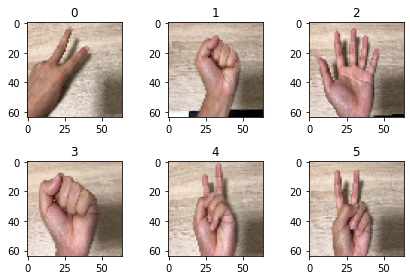

In [27]:
import matplotlib.pyplot as plt
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])

## AIモデル作成
ニューラルネットワーク（CNN）モデルを作成します これは、KerasのMNISTと呼ばれる文字認識に使われるニューラルネットワークモデルをベースにしています。

MNISTは、0,1の2値ですが、RGB画像に対応できるように改造しています。具体的には、最初の層の入力サイズを input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)とすることで対応しています。

In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy', 
    metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
#モデルの概要を確認
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                        

In [30]:
#AIモデルの学習を行います
%%time
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

Epoch 1/20
14/14 [==============================] - ETA: 0s - batch: 6.5000 - size: 7.9286 - loss: 1.8076 - accuracy: 0.3063

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


14/14 [==============================] - 4s 202ms/step - batch: 6.5000 - size: 7.9286 - loss: 1.8081 - accuracy: 0.3063 - val_loss: 1.0379 - val_accuracy: 0.6607
Epoch 2/20
14/14 [==============================] - 3s 192ms/step - batch: 6.5000 - size: 7.9286 - loss: 0.9512 - accuracy: 0.5315 - val_loss: 0.8046 - val_accuracy: 0.7143
Epoch 3/20
14/14 [==============================] - 3s 188ms/step - batch: 6.5000 - size: 7.9286 - loss: 0.6417 - accuracy: 0.7748 - val_loss: 0.5376 - val_accuracy: 0.8571
Epoch 4/20
14/14 [==============================] - 3s 190ms/step - batch: 6.5000 - size: 7.9286 - loss: 0.3297 - accuracy: 0.9279 - val_loss: 0.3858 - val_accuracy: 0.9286
Epoch 5/20
14/14 [==============================] - 3s 238ms/step - batch: 6.5000 - size: 7.9286 - loss: 0.2480 - accuracy: 0.9099 - val_loss: 0.2752 - val_accuracy: 0.9464
Epoch 6/20
14/14 [==============================] - 3s 192ms/step - batch: 6.5000 - size: 7.9286 - loss: 0.1002 - accuracy: 0.9640 - val_loss: 0.5

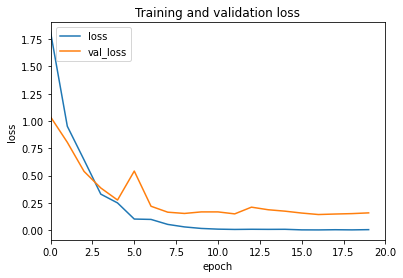

In [31]:
#学習結果の可視化
#lossを確認します。低いほど良い性能を示します。
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

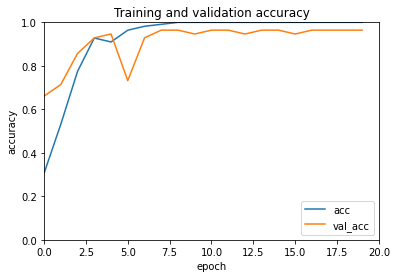

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


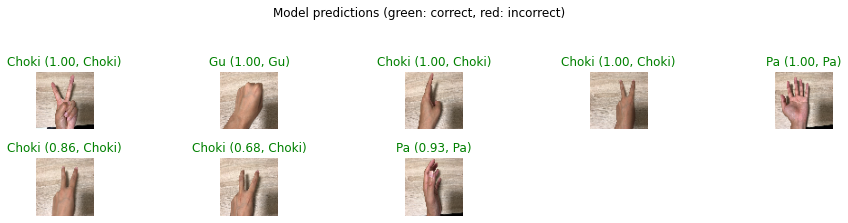

In [33]:
#学習させたモデルを使った推定

# Get the ordered list of class names:
import PIL.Image as Image
class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = True
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]
predicted_batch = model.predict(validation_image_batch)

# Returns the indices of the maximum values along a given axis
predicted_id = np.argmax(predicted_batch, axis=-1)

# Return the maximum values along a given axis
predicted_score = np.max(predicted_batch, axis=-1)

predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

# Display the classification results for the first 30 images
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # Convert the range from -1 to 1 to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255,np.int32))
  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + ' ({:.2f}, {})'.format(
      predicted_score[n], validation_label[n]), color=color)
  plt.axis('off')

_ = plt.suptitle('Model predictions (green: correct, red: incorrect)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


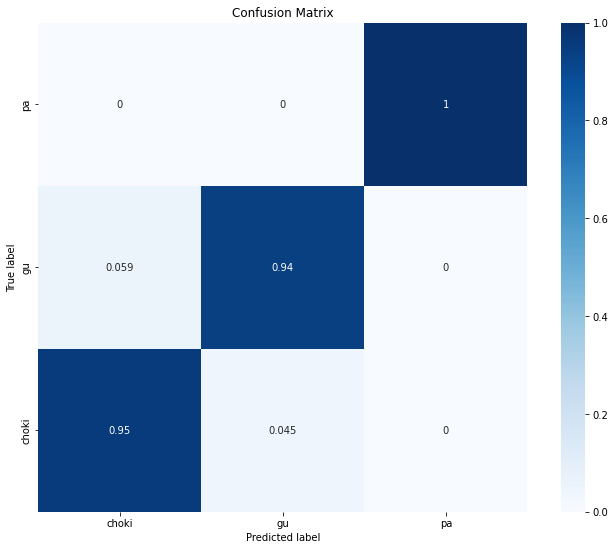

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.shuffle =  False
validation_data.batch_size = 1

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

predicted = model.predict_generator(validation_data, steps=validation_data.n)
predicted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(validation_data.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()